<a href="https://colab.research.google.com/github/UdayKhunt/Machine-Learning-Projects/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [2]:
calories = pd.read_csv('/content/calories.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
calories_data.shape

(15000, 9)

In [9]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

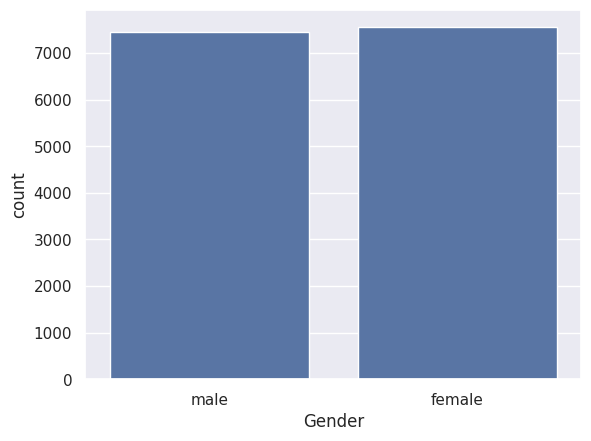

In [11]:
sns.countplot(x='Gender',data=calories_data)

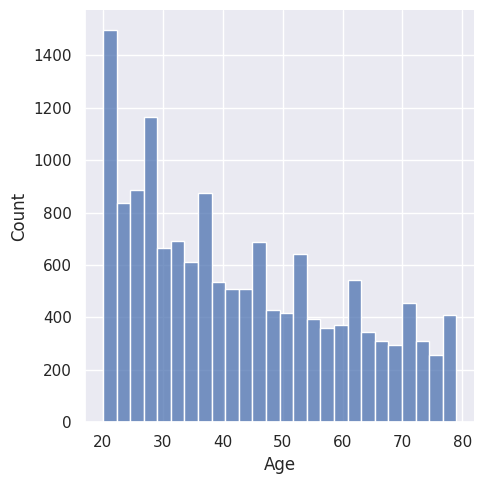

In [12]:
sns.displot(x='Age',data=calories_data)

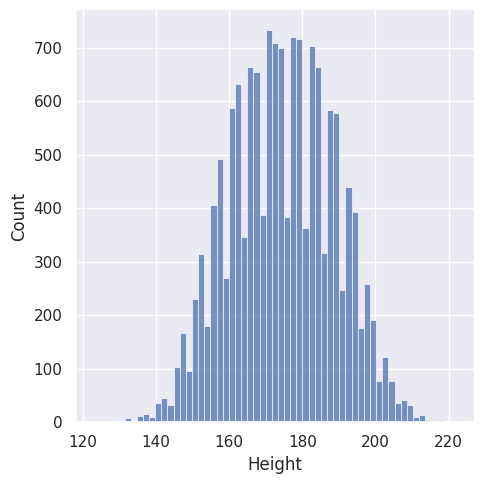

In [13]:
sns.displot(x='Height',data=calories_data)

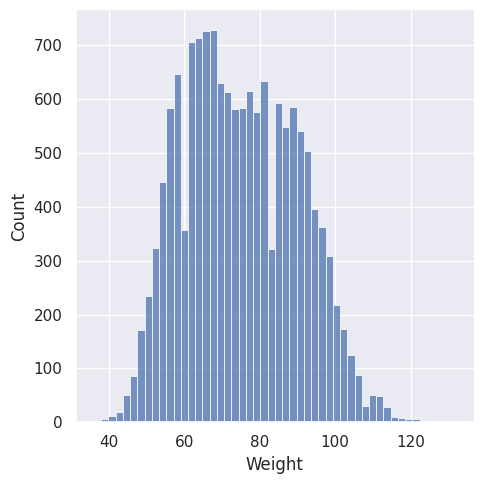

In [14]:
sns.displot(x='Weight',data=calories_data)

In [15]:
correlation = calories_data.drop(['User_ID' , 'Gender'], axis=1).corr()

<Axes: >

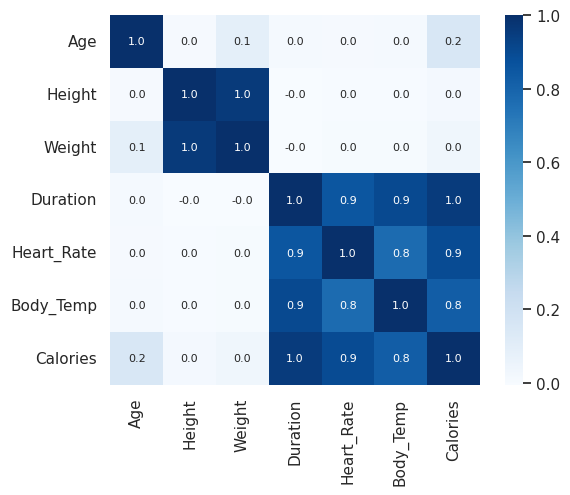

In [16]:
sns.heatmap(correlation , cbar = True , cmap = 'Blues' , square = True , fmt = '.1f' , annot = True , annot_kws = {'size' : 8})

In [17]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [18]:
calories_data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [19]:
calories_data.replace({'Gender' : {'male' : 1 , 'female' : 0}} , inplace = True)

In [20]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [21]:
X=calories_data.drop(['User_ID' , 'Calories'], axis = 1)
Y=calories_data['Calories']

In [22]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [23]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [24]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 2 , test_size = .2)

In [25]:
model = XGBRegressor()

In [26]:
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
train_data_prediction = model.predict(X_train)
r2_train_score = metrics.r2_score(train_data_prediction , Y_train)
print(r2_train_score)

0.9995692990257089


In [28]:
test_data_prediction = model.predict(X_test)
r2_test_score = metrics.r2_score(test_data_prediction , Y_test)
print(r2_test_score)

0.9987986496234057


In [29]:
input=(1,68,190.0,94.0,29.0,105.0,40.8)
input_as_np_array = np.asarray(input)
input_reshaped = input_as_np_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print('Calories burnt : ' , prediction[0])

Calories burnt :  236.13371
